<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Logistic%20Regression/logistic_Regression_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Logistic Regression

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

# Importing the datasets

df = pd.read_csv('https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Logistic%20Regression/Social_Network_Ads.csv')
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


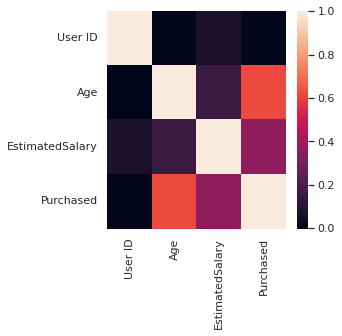

In [82]:
sns.set(rc={"figure.figsize":(4, 4)}) 
sns.heatmap(df.corr())

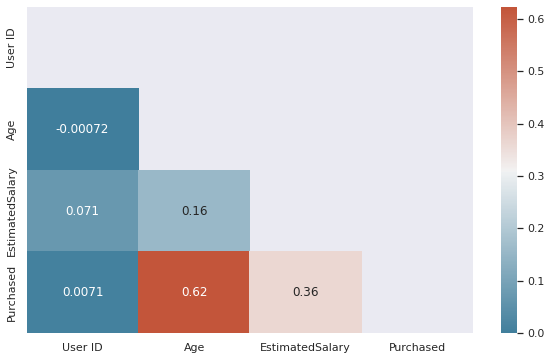

In [83]:
# Correlation heatmap with mask for upper traingle
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(10, 6))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

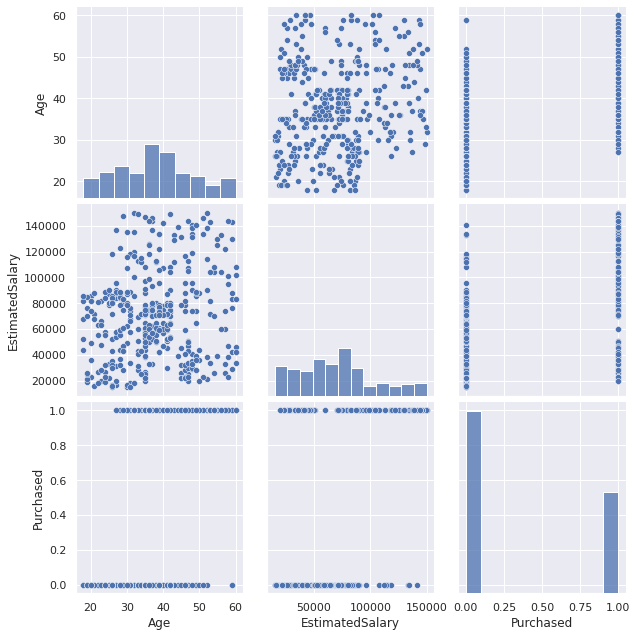

In [84]:
sns.pairplot(df[['Age','EstimatedSalary','Purchased']], height=3)

In [85]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [86]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [87]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results

y_pred_train = classifier.predict(X_train)
y_pred_test  = classifier.predict(X_test)

In [94]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm1  = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

cm1

array([[172,  17],
       [ 36,  75]])

In [89]:
cm2

array([[65,  3],
       [ 8, 24]])

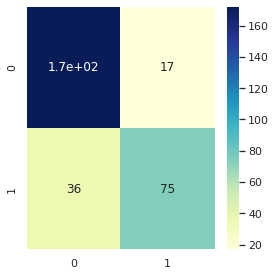

In [125]:
fig, axs = plt.subplots(figsize=(4, 4), tight_layout=True)
cm_train = pd.DataFrame(cm1, range(2), range(2))
sns.heatmap(cm_train, annot=True, cmap="YlGnBu")
plt.show()

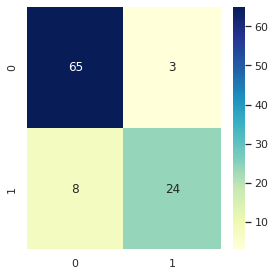

In [124]:
fig, axs = plt.subplots(figsize=(4, 4), tight_layout=True)
cm_test = pd.DataFrame(cm2, range(2), range(2))
sns.heatmap(cm_test, annot=True, cmap="YlGnBu")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


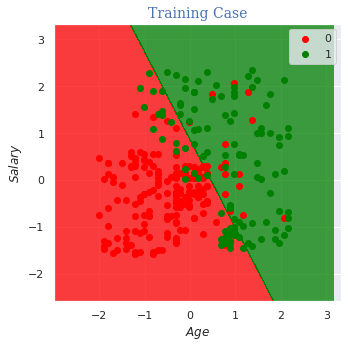

In [131]:
# Visualising the Training set results 
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(figsize=(5, 5), tight_layout=True)

X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title(r'Training Case', fontname= 'serif',fontsize=14, color='b')
plt.xlabel(r'$ Age $', fontsize=12)
plt.ylabel(r'$ Salary $', fontsize=12)
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


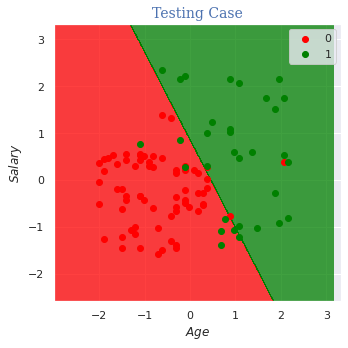

In [132]:
# Visualising the Training set results 
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(figsize=(5, 5), tight_layout=True)

X_Set, Y_Set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title(r'Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.xlabel(r'$ Age $', fontsize=12)
plt.ylabel(r'$ Salary $', fontsize=12)
plt.legend()
plt.show()